In [1]:
#!pip install nbimporter
#import nbimporter
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
from tqdm import tqdm
from random import sample

from utils import plot

%run Fonctions_projet.ipynb

#Download data

#maybe better to export data from introduction before

#df of log returns
df_60m = pd.read_parquet("data/clean/60m/data_clean_60m_log_ret.parquet")

In [2]:
#Rolling clustering for 5m dataset


#Cluster tickers

#Compute T=3*N
N = df_60m.shape[1]
T = N // 3

#Number of windows possible
lag_max = df_60m.shape[0] - T
liste = RolledCluster(df_60m, T, "louvain_cluster/date/60m", True, False, lag_max)

In [3]:
liste_cluster = dask.compute(dask.compute(liste))[0][0]
#liste_cluster

In [4]:
number_of_clusters = []
for element in liste_cluster:
    number_of_clusters.append(len(element["Cluster"].unique()))

In [5]:
df_n_clusters = pd.DataFrame(number_of_clusters, columns=['Clusters'])
df_n_clusters["Datetime"] = df_60m[-len(df_n_clusters):].index

In [6]:
df_n_clusters

,Clusters,Datetime
0,6,2020-03-04 11:30:00-05:00
1,6,2020-03-04 12:30:00-05:00
2,5,2020-03-04 13:30:00-05:00
3,7,2020-03-04 14:30:00-05:00
4,5,2020-03-04 15:30:00-05:00
...,...,...
3347,2,2022-01-26 14:30:00-05:00
3348,2,2022-01-26 15:30:00-05:00
3349,2,2022-01-27 09:30:00-05:00
3350,2,2022-01-27 10:30:00-05:00


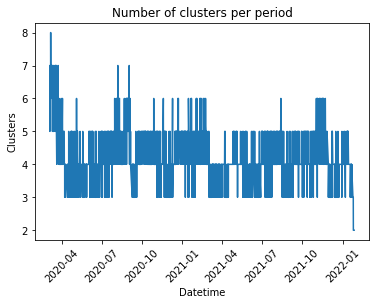

In [7]:
plot(df_n_clusters, x="Datetime", y="Clusters", title='Number of clusters per period')

In [8]:
df_n_clusters["ARI"] = [1] + RolledARI(liste_cluster)

100%|██████████| 3351/3351 [00:07<00:00, 449.91it/s]


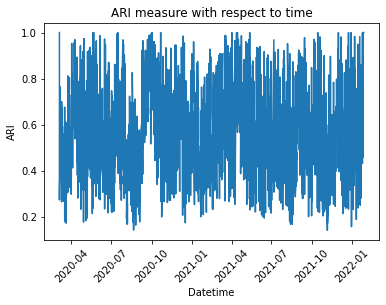

In [9]:
plot(df_n_clusters, x="Datetime", y="ARI", title='ARI measure with respect to time')

In [10]:
for i in tqdm(range(len(liste_cluster)-1)):
    if len(liste_cluster[i].value_counts()) == len(liste_cluster[i+1].value_counts()):
        liste_cluster[i+1] = keep_cluster_number(liste_cluster[i], liste_cluster[i+1])

 56%|█████▋    | 1893/3351 [00:39<00:30, 47.53it/s]


ZeroDivisionError: division by zero